In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [303]:
file_name = 'Stars.csv'
df = pd.read_csv(file_name)
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [304]:
df_averaged = df.groupby(['Spectral_Class']).count()
df_averaged = df_averaged.rename(columns = {'R': 'Star_count'})
show = lambda kind: df_averaged.plot(y='Star_count', ylabel='count', kind=kind)

<AxesSubplot: xlabel='Spectral_Class', ylabel='count'>

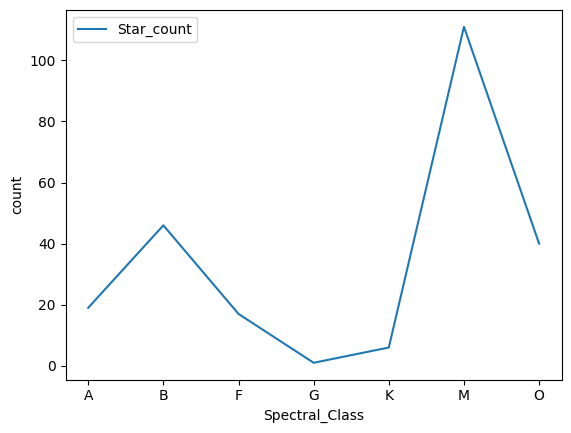

In [305]:
show('line')

<AxesSubplot: xlabel='Spectral_Class', ylabel='count'>

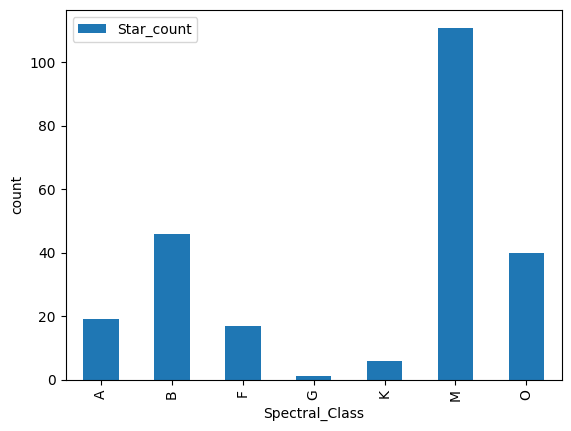

In [306]:
show('bar')

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


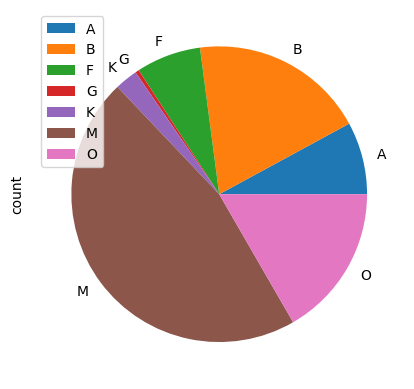

In [307]:
show('pie')
df

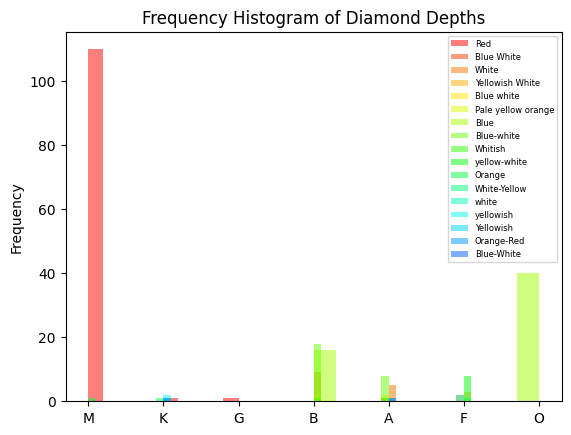

In [308]:
colors = ['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White']

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(colors) + 10)
kwargs = dict(alpha=0.5)

for i, color in enumerate(colors):
    x = df.loc[df.Color == color, 'Spectral_Class']


    plt.hist(x, **kwargs, color=cmap(i), label=color)

plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.legend(loc='upper right', fontsize=6);

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='RT', ylabel='L'>

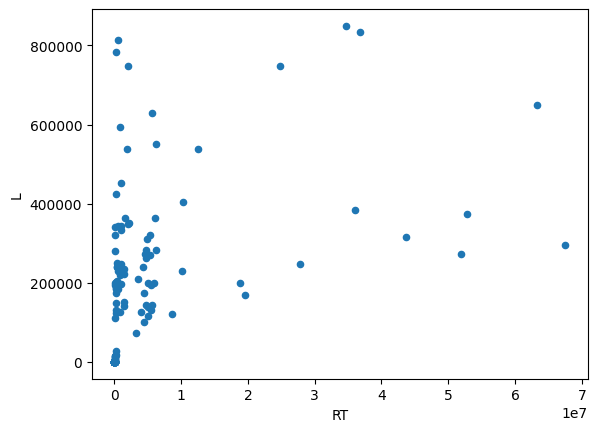

In [309]:
df['RT'] = df['Temperature'] * df['R']

df.plot.scatter(
    x='RT',
    y='L',
)